In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt 

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

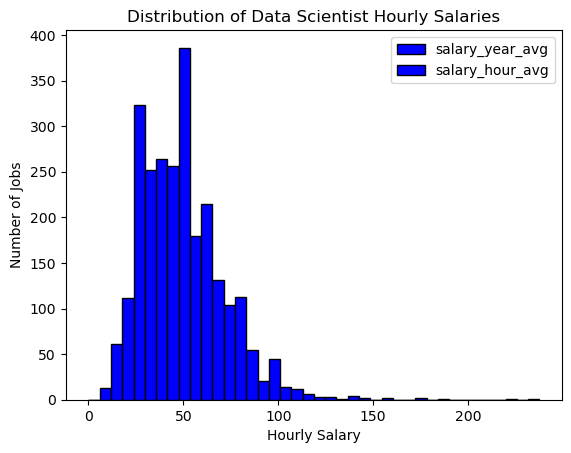

In [3]:
# Create a histogram to show the distribution of hourly salaries (use salary_hour_avg column) for Data Scientist job postings:
# Create a new DataFrame called df_DS to filter out 'Data Scientist' jobs.
# Customize the plot by setting the number of bins to 40 and the bar color to blue.
# Label the x-axis as 'Hourly Salary' and the y-axis as 'Number of Jobs'.

df_DS = df[df['job_title_short'] == 'Data Scientist'].copy()
df_DS = df_DS.dropna(subset=['salary_hour_avg'])

df_DS.plot(kind = 'hist', bins = 40, color = 'blue', edgecolor = 'black' )
plt.xlabel('Hourly Salary')
plt.ylabel('Number of Jobs')
plt.title('Distribution of Data Scientist Hourly Salaries')
plt.show()

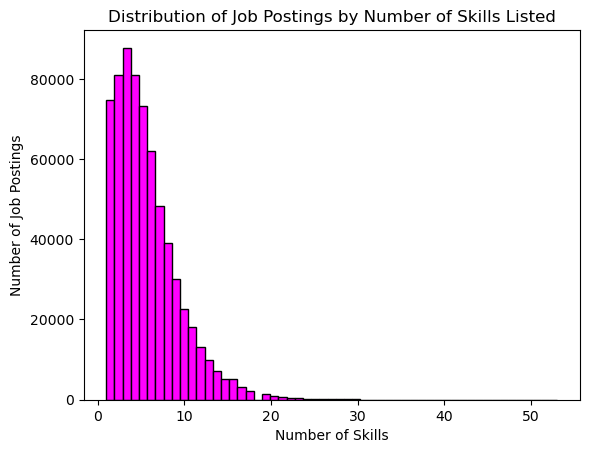

In [4]:
# Create a histogram to show the distribution of job postings by the number of skills listed using the job_skills column:
# Create a new DataFrame called df_skills to filter out job postings with non-null job_skills.
# Customize the plot by setting the number of bins to 55, the bar color to 'magenta'
# Add a title 'Distribution of Job Postings by Number of Skills Listed'.
# Label the x-axis as 'Number of Skills' and the y-axis as 'Number of Job Postings'.

df_skills = df.dropna(subset=['job_skills']).copy()
df_skills['num_skills'] = df_skills['job_skills'].apply(len)

df_skills['num_skills'].plot(kind='hist', bins=55, color='magenta', edgecolor='black')
plt.xlabel('Number of Skills')
plt.ylabel('Number of Job Postings')
plt.title('Distribution of Job Postings by Number of Skills Listed')
plt.show()

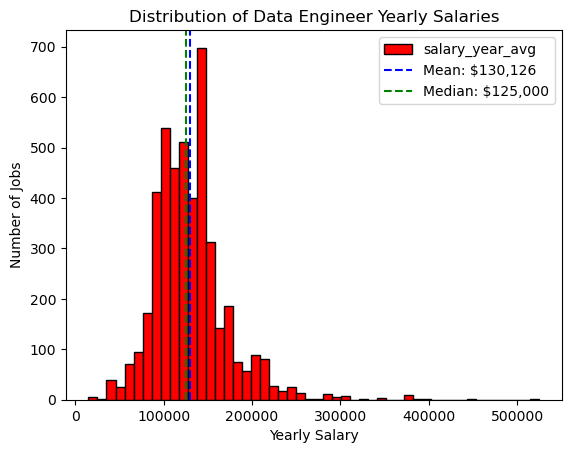

In [7]:
# Create a histogram to show the distribution of average yearly salaries (salary_year_avg) for Data Engineer job postings:

# Create a new DataFrame called df_DE to filter out 'Data Engineer' jobs.
# Customize the plot by setting the number of bins to 50, the bar color to red
# Add annotations for the mean and median salaries, using plt.axvline(); for the parameters specify:
# color: 'blue'/'green'
# linestyle: 'dashed'
# label: e.g., f'Mean: ${mean_salary:,.0f}'
# Label the x-axis as 'Yearly Salary' and the y-axis as 'Number of Jobs'.

df_DE = df[df['job_title_short'] == 'Data Engineer'].copy()
df_DE = df_DE.dropna(subset=['salary_year_avg'])

mean_salary = df_DE['salary_year_avg'].mean()
median_salary = df_DE['salary_year_avg'].median()

df_DE['salary_year_avg'].plot(kind='hist', bins=50, color='red', edgecolor='black')
plt.axvline(mean_salary, color='blue', linestyle='dashed', label=f'Mean: ${mean_salary:,.0f}')
plt.axvline(median_salary, color='green', linestyle='dashed', label=f'Median: ${median_salary:,.0f}')
plt.xlabel('Yearly Salary')
plt.ylabel('Number of Jobs')
plt.title('Distribution of Data Engineer Yearly Salaries')
plt.legend()
plt.show()